
 # Data Mining Assignment 2_DT_NB

## Student Details

Student Name and ID of the member submitting the assignment: 

Student Name and ID of the remaining members: 

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Programming Assignment Details (5 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Gender_Classifier.csv .Output/prediction variable is 'gender' [1 points]

2) Create a dataframe and print the first and last seven records of your dataset.  [1 points]

3) Print the class labels. [1 points]

4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022 [2 points]

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
#import scikitplot as skplt
from matplotlib import rcParams
#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix

In [22]:
gender = pd.read_csv(r'C:\Users\bala4\Downloads\PA2\Gender_Classifier.csv',encoding = 'Latin-1')

In [6]:
gender.count()

_unit_id                 20050
_golden                  20050
_unit_state              20050
_trusted_judgments       20050
_last_judgment_at        20000
gender                   20050
gender:confidence        20024
profile_yn               20050
profile_yn:confidence    20050
created                  20050
description              16306
fav_number               20050
gender_gold                 50
link_color               20050
name                     20050
profile_yn_gold             50
profileimage             20050
retweet_count            20050
sidebar_color            20050
text                     20050
tweet_coord                159
tweet_count              20050
tweet_created            20050
tweet_id                 20050
tweet_location           12566
user_timezone            12252
dtype: int64

In [23]:
# Printing first 7 records
gender.head(7)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/2015 1:47,female,1.0000,yes,1.0,3/11/2010 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/2015 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/2015 1:57,brand,1.0000,yes,1.0,4/24/2008 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/2015 12:40,6.590000e+17,Worldwide,Eastern Time (US & Canada)


In [24]:
gender.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [17]:
#Printing last 7 records
gender.tail(7)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20043,815756700,True,golden,240,NaN,male,1.0000,yes,1.0,9/27/2011 0:19,...,https://pbs.twimg.com/profile_images/378800000...,1,5ED4DC,"Game faggot and venison loin, crisp spelt and ...",NaN,8193,10/26/2015 13:19,6.590000e+17,Chertsey Bridge,NaN
20044,815756767,True,golden,227,NaN,female,1.0000,yes,1.0,6/11/2014 1:55,...,https://pbs.twimg.com/profile_images/643483977...,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaN,6669,10/26/2015 13:19,6.590000e+17,NaN,NaN
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/2015 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/2015 13:20,6.590000e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/2012 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/2015 12:40,6.590000e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/2012 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/2015 13:20,6.590000e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/2012 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/2015 12:40,6.590000e+17,Texas Hill Country,NaN
20049,815757985,True,golden,249,NaN,female,1.0000,yes,1.0,4/14/2014 17:22,...,https://pbs.twimg.com/profile_images/655134724...,0,C0DEED,I think for my APUSH creative project I'm goin...,NaN,2922,10/26/2015 13:19,6.590000e+17,NaN,NaN


In [18]:
# Class Labels
gender['gender'].unique()

array(['male', 'female', 'brand', 'unknown', 'Other'], dtype=object)

In [11]:
gender['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Other        97
Name: gender, dtype: int64

In [19]:
gender_copy = gender.copy()

In [25]:
# Dropping rows other than male and female
gender =  gender.loc[(gender.gender == "male") | (gender.gender == "female")]

In [13]:
# Test Train Split (Sample)
#X = gender.drop('gender',axis = 1)
#Y = gender['gender']
#X_train,X_test,y_train,y_test = train_test_split(X,Y ,test_size = .2,random_state = 2022)
#X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 2022)

In [14]:
gender.dtypes

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_coord               object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

# Preprocessing

In [26]:
def cardinality_list(col,count):
    df = pd.DataFrame(gender['user_timezone'].value_counts())
    return list(df[df['user_timezone'] > count].reset_index()['index'])

def date_to_days(col):
    gender[col]=pd.to_datetime(gender[col])
    gender[col] = gender[col].apply(lambda x:date.today() - x.date())
    

In [27]:
# Columns removed Unit_id,tweet_id,description,text,name,profile_image
num=['_trusted_judgments','gender:confidence','profile_yn:confidence','fav_number','retweet_count','tweet_count']
cat=['_unit_state','gender','gender_gold','link_color','profile_yn_gold','sidebar_color','tweet_coord','tweet_location','user_timezone']
date=['tweet_created','created','_last_judgment_at']
boolean =['_golden','profile_yn']

In [28]:
gender.count()

_unit_id                 12894
_golden                  12894
_unit_state              12894
_trusted_judgments       12894
_last_judgment_at        12858
gender                   12894
gender:confidence        12894
profile_yn               12894
profile_yn:confidence    12894
created                  12894
description              11194
fav_number               12894
gender_gold                 36
link_color               12894
name                     12894
profile_yn_gold             36
profileimage             12894
retweet_count            12894
sidebar_color            12894
text                     12894
tweet_coord                 78
tweet_count              12894
tweet_created            12894
tweet_id                 12894
tweet_location            8747
user_timezone             8497
dtype: int64

In [29]:

# Imputing values of tweet_location,user_timezone and gender:confidence
print(gender['tweet_location'].mode())
print(gender['user_timezone'].mode())
print(gender['gender:confidence'].mode())
gender['tweet_location'] = gender['tweet_location'].fillna('London')
gender['user_timezone'] = gender['user_timezone'].fillna('Eastern Time (US & Canada)')
gender['gender:confidence'] = gender['gender:confidence'].fillna(1.0)

#Changing Boolean values to 0 and 1
gender['profile_yn'] = gender['profile_yn'].replace({'yes':1,'no':0})
gender['_golden'] = gender['_golden'].astype(int)

# Encoding Gender 1 for male and 0 for female
gender['gender'] = gender['gender'].replace({'male':1,'female':0})

0    London
dtype: object
0    Eastern Time (US & Canada)
dtype: object
0    1.0
dtype: float64


# Reducing Cardinality

In [30]:
gender['sidebar_color'].value_counts()

C0DEED    5252
0         2703
FFFFFF    2662
EEEEEE     479
181A1E     236
          ... 
A9CBF5       1
BF0606       1
191A18       1
0C0D0D       1
398757       1
Name: sidebar_color, Length: 419, dtype: int64

In [31]:
l=cardinality_list('user_timezone',100)
m = cardinality_list('link_color',100)
n = cardinality_list('sidebar_color',100)
# Reducing Cardinality in user_timezone
gender['user_timezone'] = [x if x in l else 'others' for x in gender['user_timezone']]
#gender['link_color'] = [x if x in l else 'others' for x in gender['link_color']]
#gender['sidebar_color'] = [x if x in l else 'others' for x in gender['sidebar_color']]

In [32]:
# Dropping gender_gold,profile_yn_gold,tweet_coord as the fillrate is less than 1%
# Dropping Dates and tweet_location
col_to_remove = ['tweet_coord','tweet_location','profile_yn_gold','gender_gold','gender']
cat_1 = [x for x in cat if x not in col_to_remove]

In [33]:
# One hot encoding
gender_1 = pd.get_dummies(gender,columns = cat_1)

In [34]:
# Scaling Data
sc = StandardScaler()
gender_1['tweet_count'] = sc.fit_transform(gender_1[['tweet_count']])
gender_1['fav_number'] = sc.fit_transform(gender_1[['fav_number']])
gender_1['_trusted_judgments'] = sc.fit_transform(gender_1[['_trusted_judgments']])
gender_1 = gender_1.drop(['text','description','name','tweet_coord','tweet_location','profile_yn_gold','profileimage','gender_gold','gender','tweet_created','created','_last_judgment_at','_unit_id','tweet_id'],axis = 1)

In [35]:
X = gender_1
Y = gender['gender']
X_train,X_test,y_train,y_test = train_test_split(X,Y ,test_size = .2,random_state = 2022)
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 2022)

In [182]:
gender['_unit_state']

0        finalized
1        finalized
2        finalized
3        finalized
4        finalized
           ...    
20045       golden
20046       golden
20047       golden
20048       golden
20049       golden
Name: _unit_state, Length: 12894, dtype: object

### DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split. [2 points]

2) Use comments to explain your code and variable names. [1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. Explain the confusion matrix and classification report in your own words). Do not copy from the internet.[4 points]

4) Print the decision tree visualization for 3 different depths using given libraries.  [3 points]

[[720 621]
 [403 835]]
              precision    recall  f1-score   support

           0       0.64      0.54      0.58      1341
           1       0.57      0.67      0.62      1238

    accuracy                           0.60      2579
   macro avg       0.61      0.61      0.60      2579
weighted avg       0.61      0.60      0.60      2579

Test Accuracy: 0.6029468786351299
ROC: 0.6400415423688789


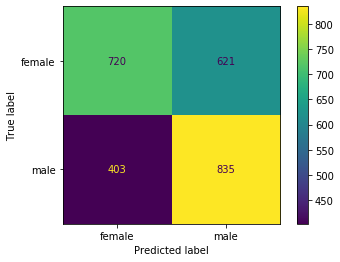

In [41]:
#Desicion Tree (Gini)
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth = 6).fit(X_train, y_train) 
y_predict = model_gini.predict(X_test)
print(cm)
cm = confusion_matrix(y_test,y_predict)
plot_confusion_matrix(model_gini,X_test,y_test,display_labels = ['female','male'])
score_rf = accuracy_score(y_test, y_dt_predict)
print(classification_report(y_test,y_predict))
print("Test Accuracy:",score_rf)
#pred_probas  = dtree_model.predict_proba(X_test)
roc = roc_auc_score(Y, dtree_model.predict_proba(X)[:, 1])
print("ROC:",roc)

[[720 621]
 [403 835]]
              precision    recall  f1-score   support

           0       0.58      0.64      0.61      1341
           1       0.56      0.50      0.53      1238

    accuracy                           0.57      2579
   macro avg       0.57      0.57      0.57      2579
weighted avg       0.57      0.57      0.57      2579

Test Accuracy: 0.5696006203955021
ROC: 0.6400415423688789


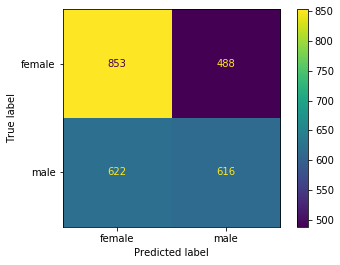

In [73]:
# Entropy
model_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3).fit(X_train, y_train) 
y_predict = model_entropy.predict(X_test)
print(cm)
cm = confusion_matrix(y_test,y_predict)
plot_confusion_matrix(model_entropy,X_test,y_test,display_labels = ['female','male'])
score_rf = accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))
print("Test Accuracy:",score_rf)
#pred_probas  = dtree_model.predict_proba(X_test)
roc = roc_auc_score(Y, dtree_model.predict_proba(X)[:, 1])
print("ROC:",roc)

In [54]:
gender.gender.value_counts()

0    6700
1    6194
Name: gender, dtype: int64

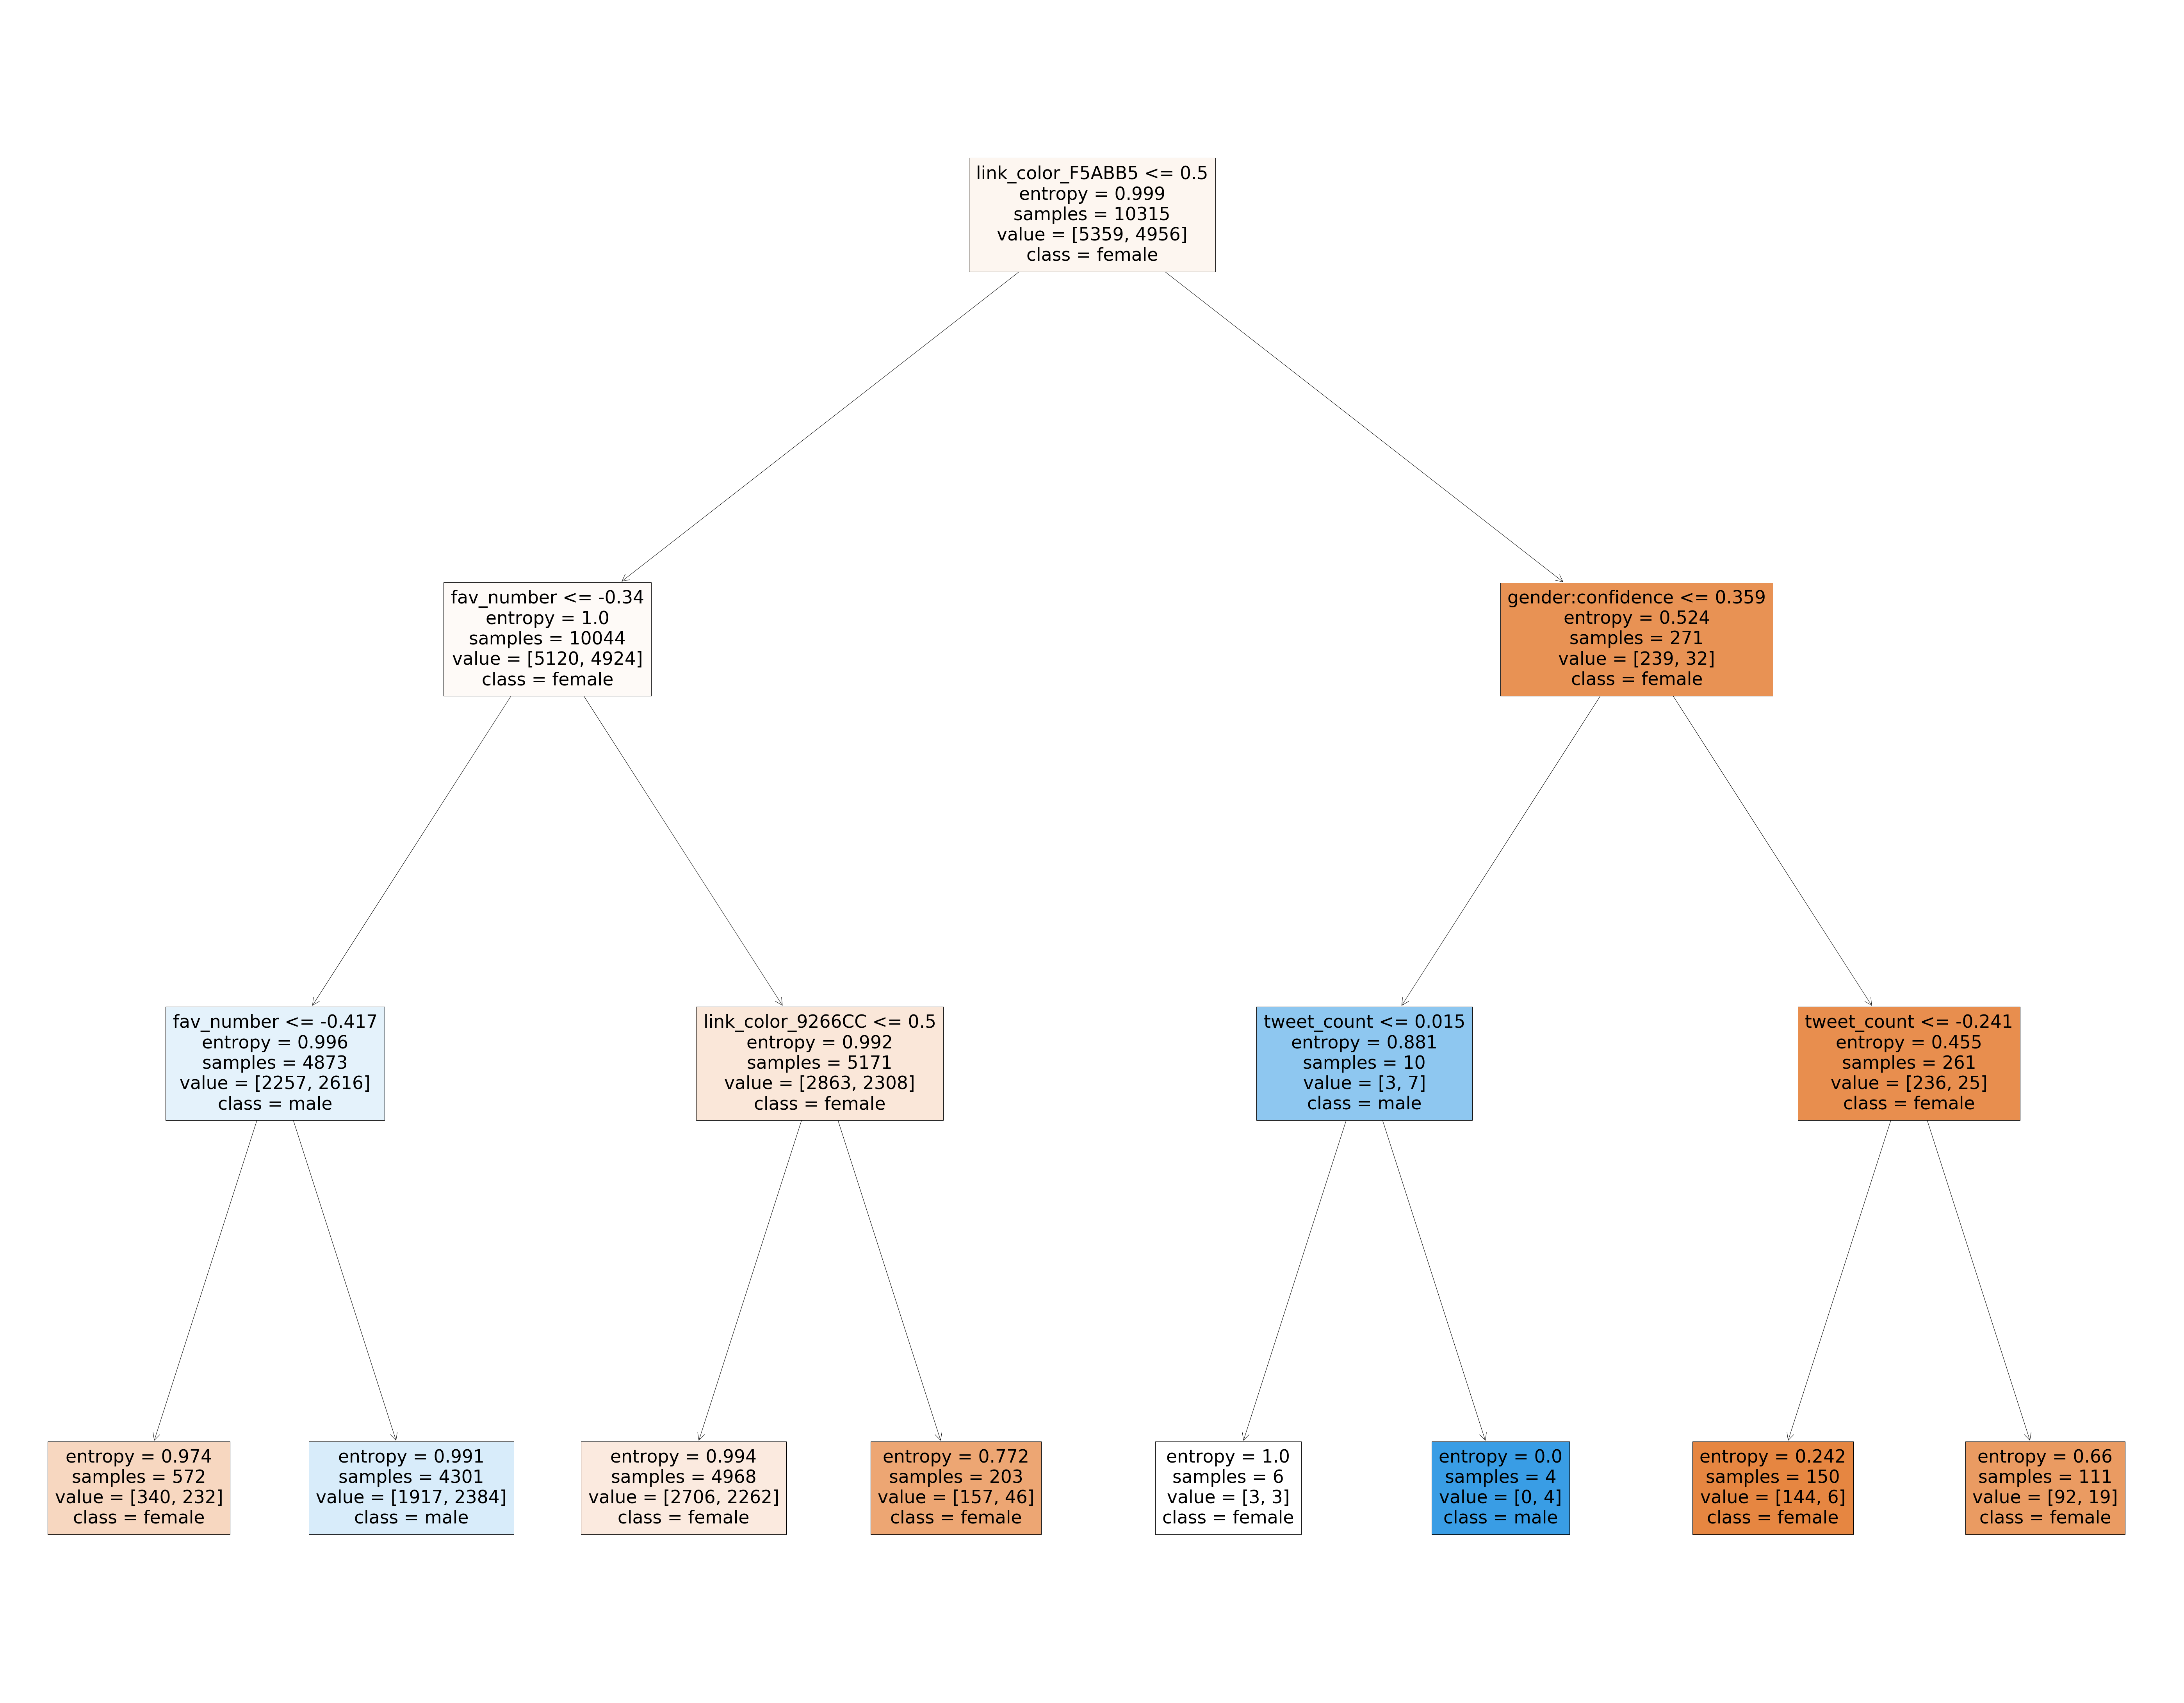

In [74]:
from sklearn import tree
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(model_gini, 
                   feature_names=gender_1.columns,  
                   class_names=['female','male'],
                   filled=True)

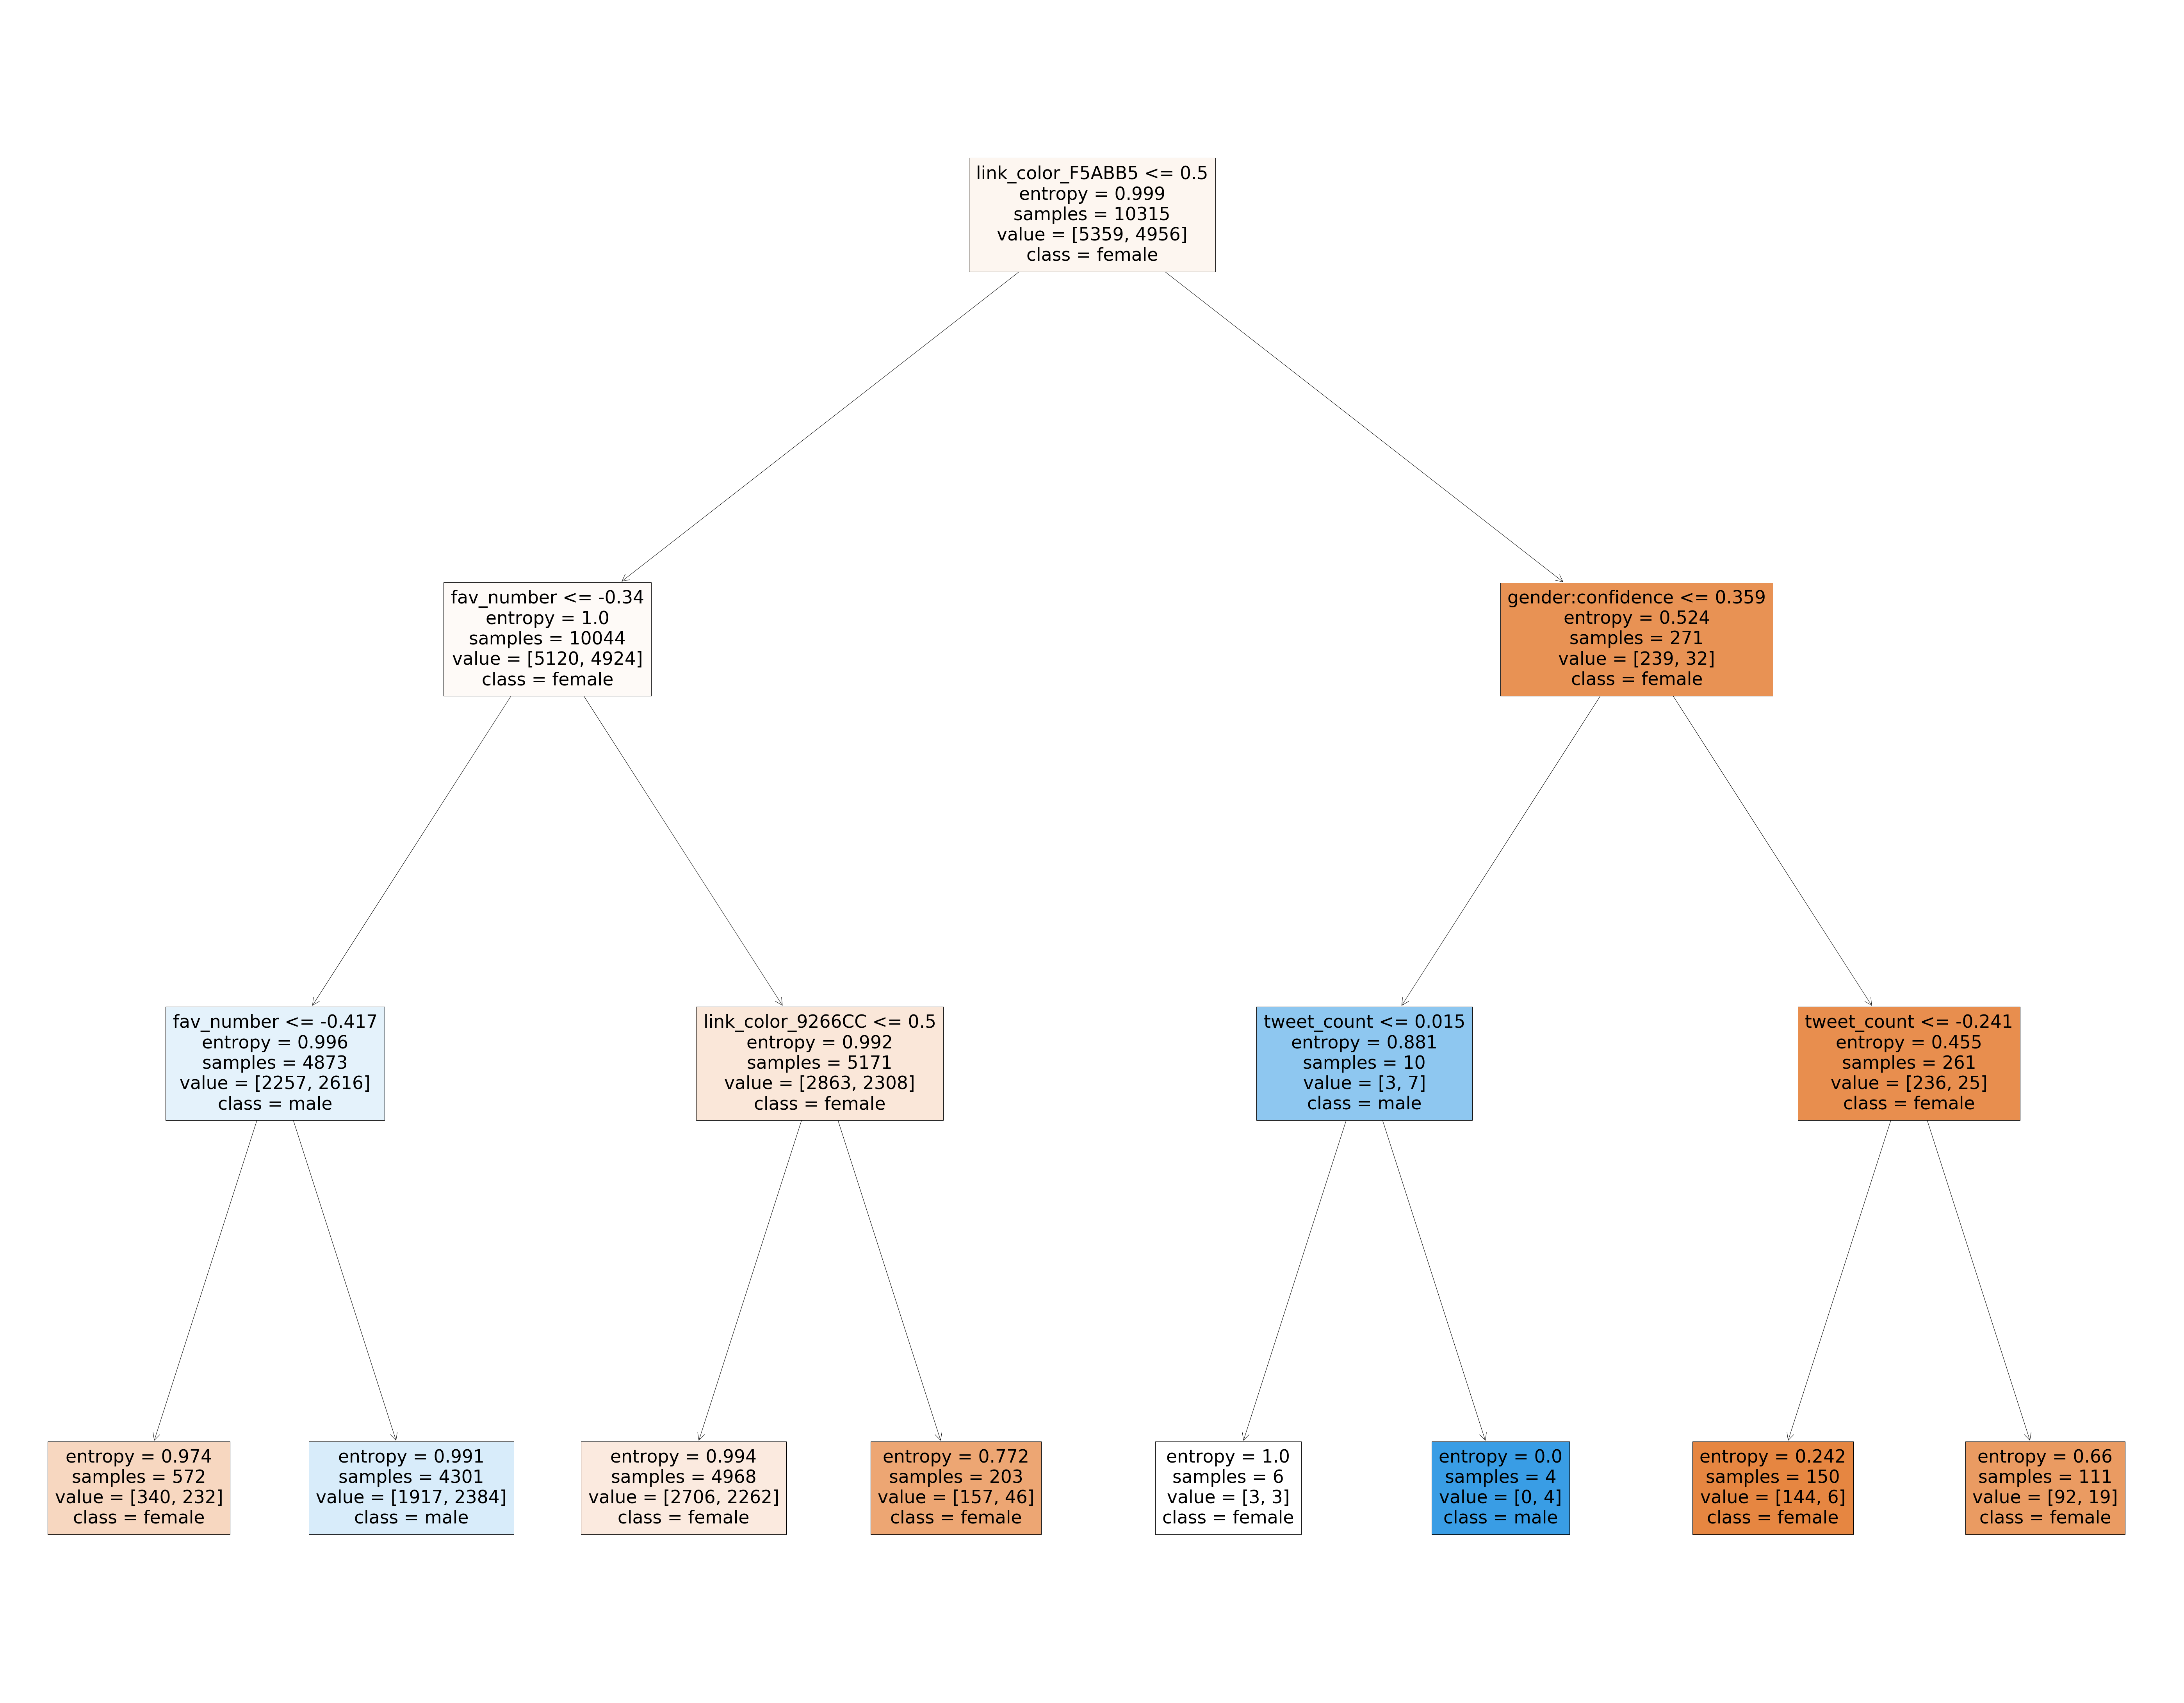

In [75]:
from sklearn import tree
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(model_entropy, 
                   feature_names=gender_1.columns,  
                   class_names=['female','male'],
                   filled=True)

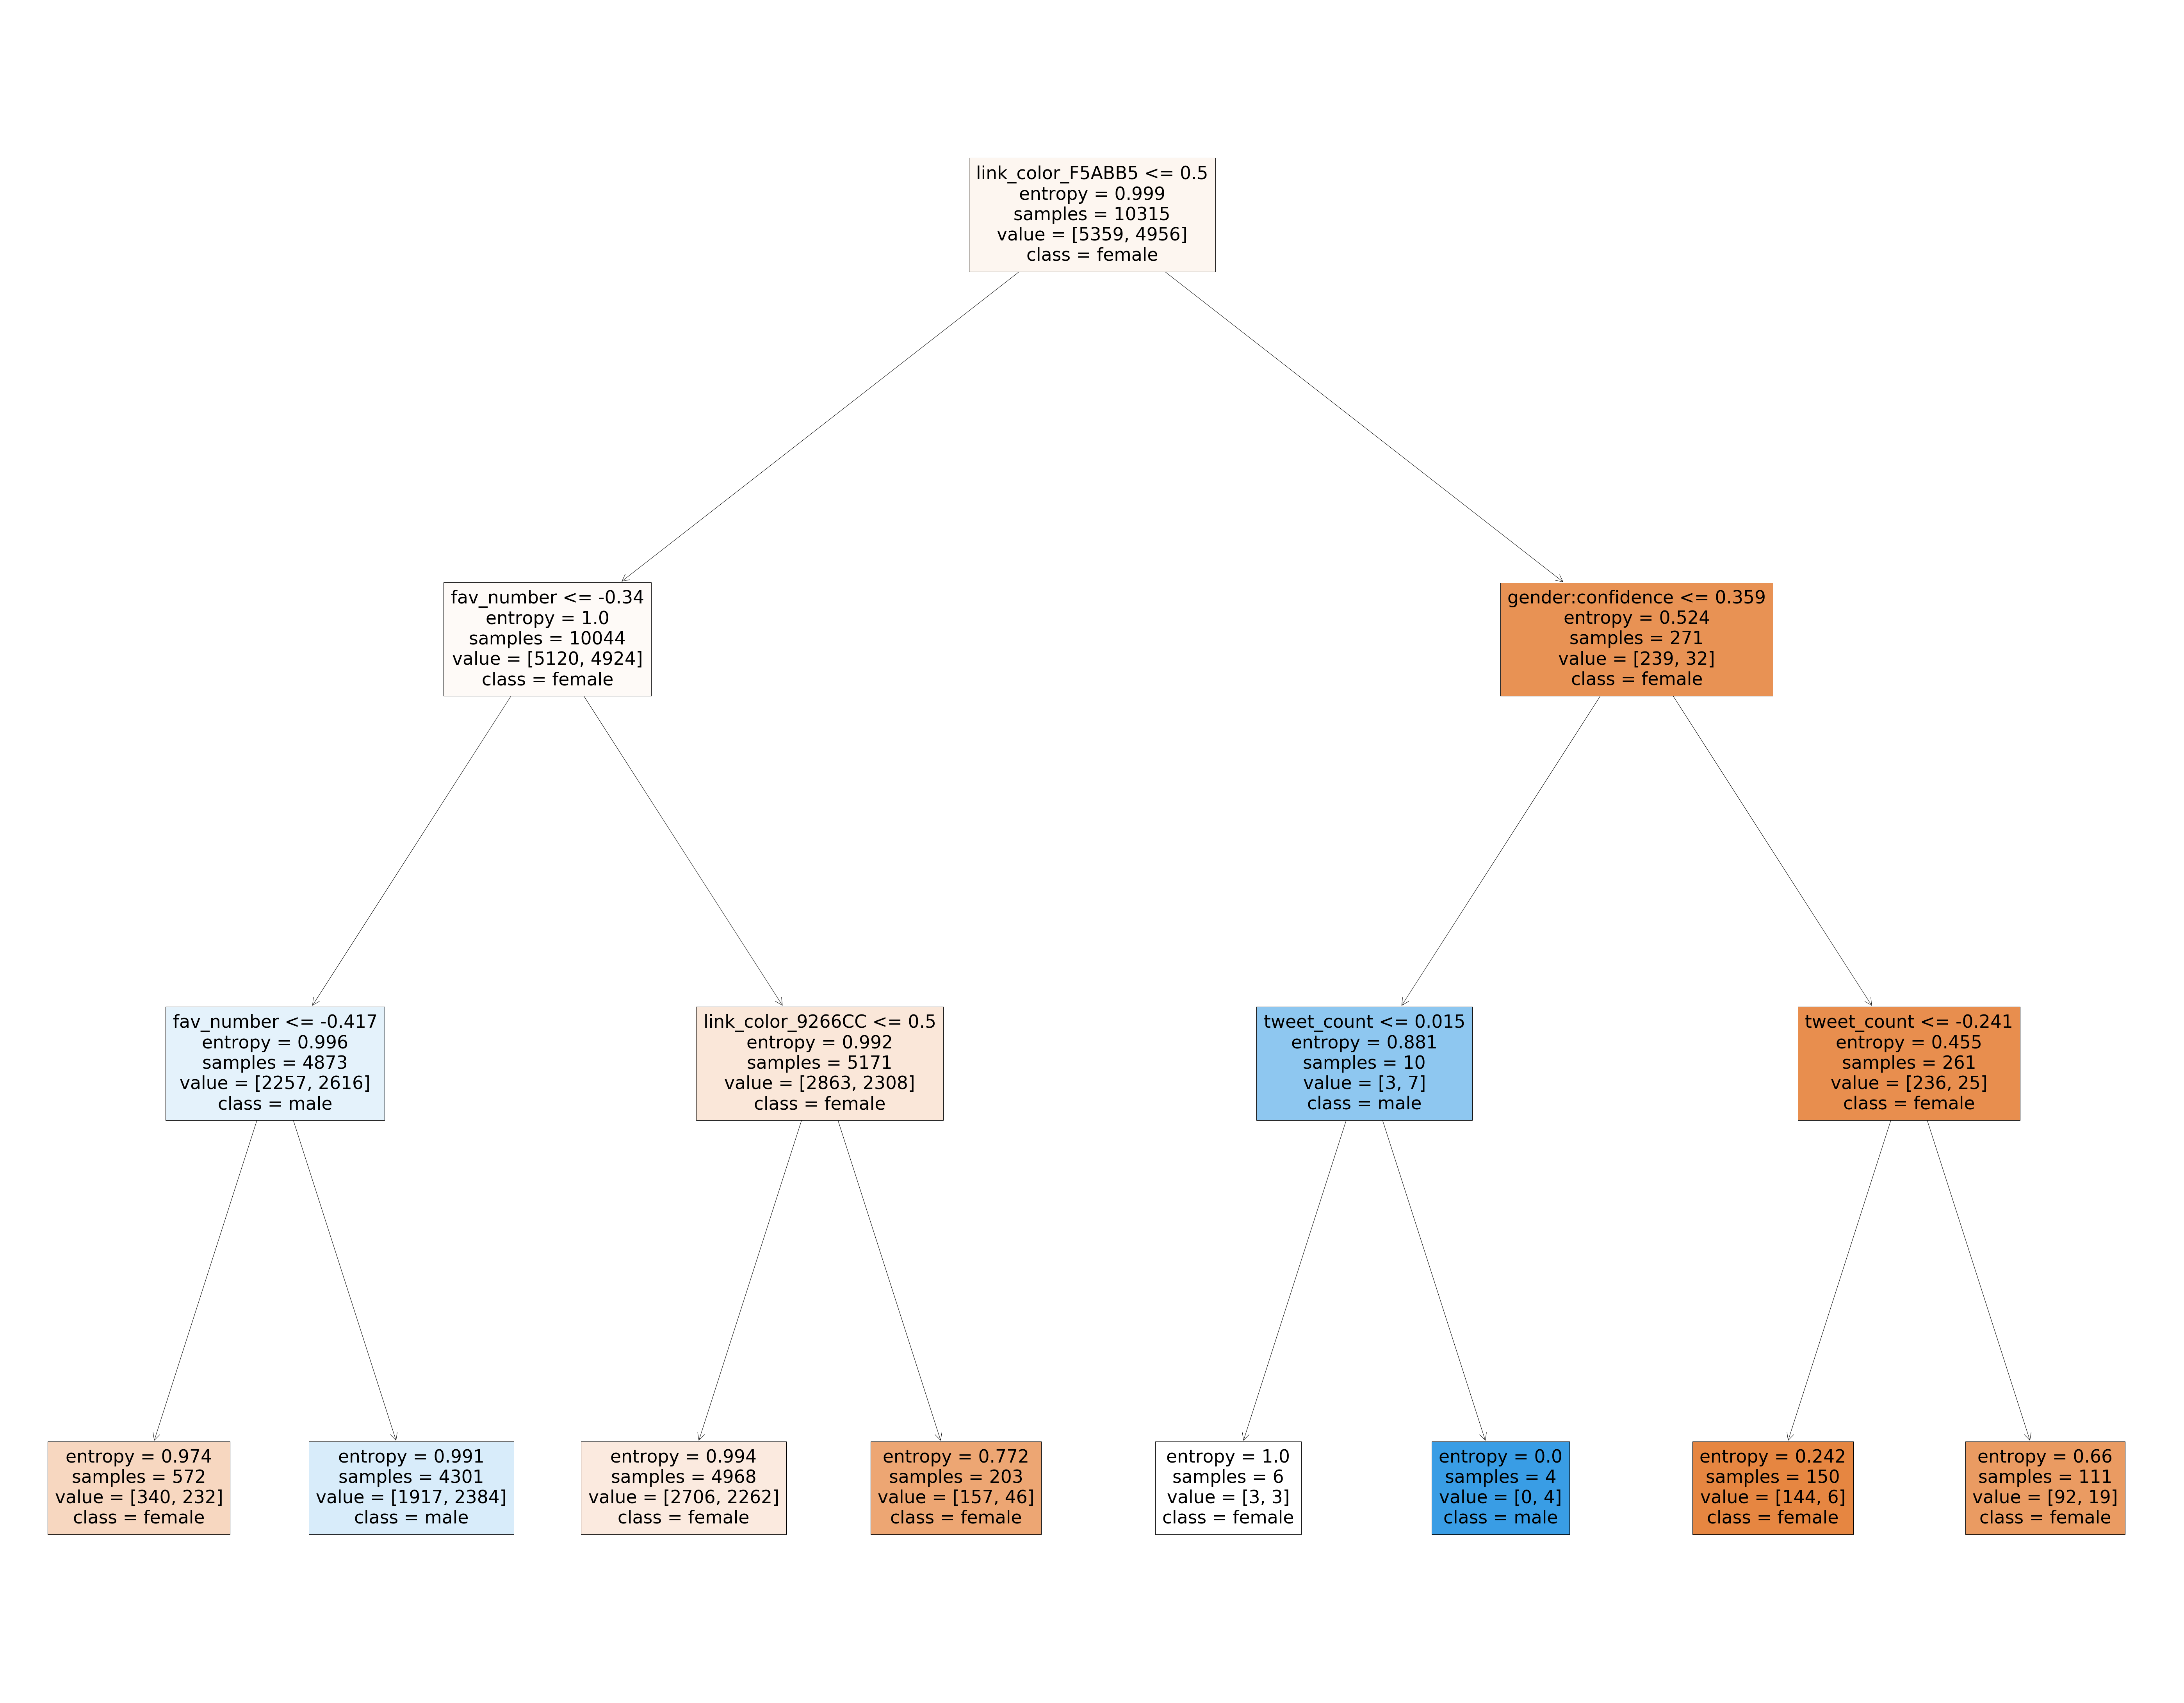

In [76]:
model_entropy_12 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 12).fit(X_train, y_train)
from sklearn import tree
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(model_entropy, 
                   feature_names=gender_1.columns,  
                   class_names=['female','male'],
                   filled=True)

# Naive Bayes (10 Points)

1) Use all types of Naive bayes classifier present in the sklearn to predict the test data. If you are not able to implement any of the classifier explain in detail why it can't be done.[5 point] 

2) Use comments to explain your code and variable names[1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support)for all the NB Classifier. show the best classifier. Explain the classification report in your own words. Do not copy from the internet. [4 points]

In [44]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB,BernoulliNB,ComplementNB,MultinomialNB
gnb_clf = GaussianNB().fit(X_train,y_train)
cnb_clf = CategoricalNB().fit(X_train,y_train)
Bnb_clf = BernoulliNB().fit(X_train,y_train)
#conb_clf = ComplementNB().fit(X_train,y_train)
#mnb_clf = MultinomialNB().fit(X_train,y_train)

[[  29 1312]
 [   5 1233]]
              precision    recall  f1-score   support

           0       0.85      0.02      0.04      1341
           1       0.48      1.00      0.65      1238

    accuracy                           0.49      2579
   macro avg       0.67      0.51      0.35      2579
weighted avg       0.68      0.49      0.33      2579

Test Accuracy: 0.4893369523070958
ROC: 0.5875892534421853


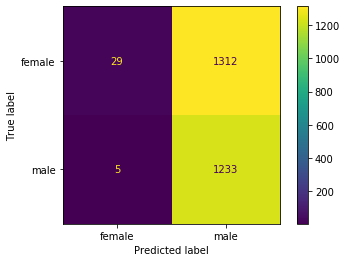

In [46]:
# Gaussian Naive Bayes
y_predict = gnb_clf.predict(X_test)

cm = confusion_matrix(y_test,y_predict)
print(cm)
score_rf = accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))
print("Test Accuracy:",score_rf)
#pred_probas  = dtree_model.predict_proba(X_test)
roc = roc_auc_score(Y, gnb_clf.predict_proba(X)[:, 1])
plot_confusion_matrix(gnb_clf,X_test,y_test,display_labels = ['female','male'])
print("ROC:",roc)

[[707 634]
 [372 866]]
              precision    recall  f1-score   support

           0       0.66      0.53      0.58      1341
           1       0.58      0.70      0.63      1238

    accuracy                           0.61      2579
   macro avg       0.62      0.61      0.61      2579
weighted avg       0.62      0.61      0.61      2579

Test Accuracy: 0.6099263280341217
ROC: 0.692253866283693


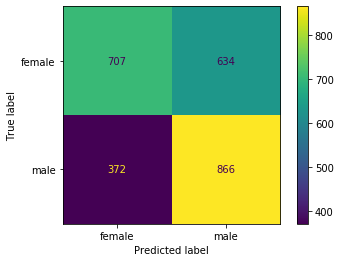

In [48]:
# Bernoulli Naive Bayes
y_predict = Bnb_clf.predict(X_test)

cm = confusion_matrix(y_test,y_predict)
print(cm)
score_rf = accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))
print("Test Accuracy:",score_rf)
#pred_probas  = dtree_model.predict_proba(X_test)
roc = roc_auc_score(Y, Bnb_clf.predict_proba(X)[:, 1])
plot_confusion_matrix(Bnb_clf,X_test,y_test,display_labels = ['female','male'])
print("ROC:",roc)

## Report (23 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier in details in your own words. Dont copy paste it from the internet. Write it on your own.  [5 points]

2) Describe the datasets like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [6 points]

4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [4 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!

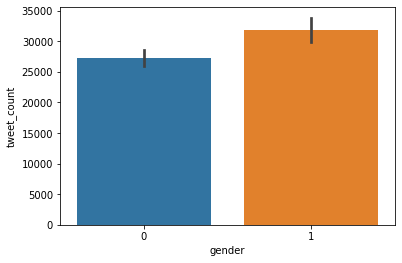

In [50]:
sns.barplot(gender.gender,gender.tweet_count)

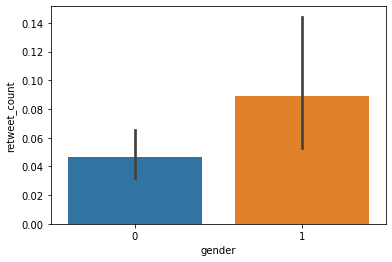

In [51]:
sns.barplot(gender.gender,gender.retweet_count)

In [55]:
gender.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

C:\Users\bala4\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bala4\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Legend does not support 1 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until


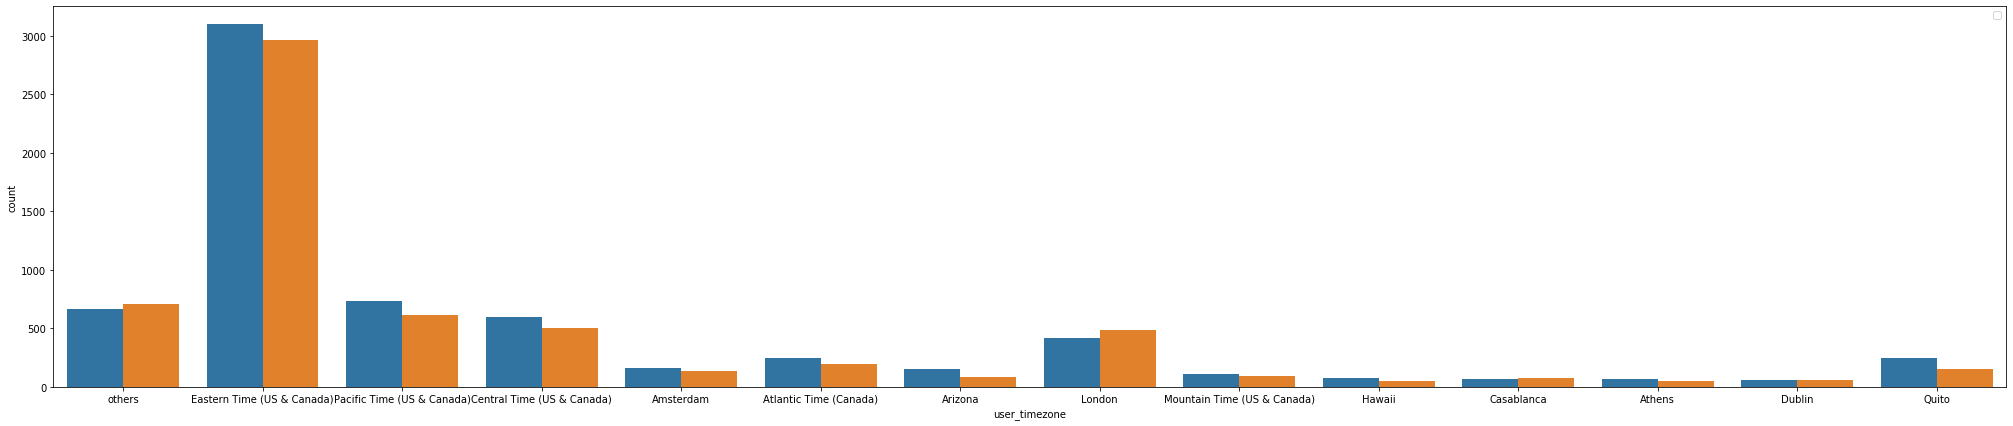

In [72]:
plt.figure(figsize=(35,7))
sns.countplot(x='user_timezone', hue='gender', data=gender)#, palette='RdBu')
plt.legend([0,1], ['female', 'male'])
plt.show()